In [ ]:
https://project-2-fw3qb8uycf93jhpohe3wmq.streamlit.app/

# Step 1: Understanding the Data


## 1.1Load and Explore the Dataset


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv")

# Display first few rows
print("🔹 Preview of Dataset:")
display(df.head())

# Check dataset shape
print(f"\n📏 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


🔹 Preview of Dataset:


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0



📏 Dataset contains 1200000 rows and 21 columns.


In [2]:
# Data types of each column
print("\n📌 Column Data Types:")
print(df.dtypes)

# Summary statistics of numerical columns
print("\n📊 Statistical Summary (Numerical Columns):")
display(df.describe().round(2))




📌 Column Data Types:
id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

📊 Statistical Summary (Numerical Columns):


,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1200000.00,1181295.00,1155051.00,1090328.00,1125924.00,835971.00,1199994.00,1062118.00,1199999.00,1200000.00
mean,599999.50,41.15,32745.22,2.01,25.61,1.00,9.57,592.92,5.02,1102.54
std,346410.31,13.54,32179.51,1.42,12.20,0.98,5.78,149.98,2.59,865.00
min,0.00,18.00,1.00,0.00,2.01,0.00,0.00,300.00,1.00,20.00
25%,299999.75,30.00,8001.00,1.00,15.92,0.00,5.00,468.00,3.00,514.00
50%,599999.50,41.00,23911.00,2.00,24.58,1.00,10.00,595.00,5.00,872.00
75%,899999.25,53.00,44634.00,3.00,34.53,2.00,15.00,721.00,7.00,1509.00
max,1199999.00,64.00,149997.00,4.00,58.98,9.00,19.00,849.00,9.00,4999.00


In [3]:

# Summary statistics of categorical columns
print("\n🔤 Categorical Value Counts:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n▶ {col}:")
    print(df[col].value_counts().head())



🔤 Categorical Value Counts:

▶ Gender:
Gender
Male      602571
Female    597429
Name: count, dtype: int64

▶ Marital Status:
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

▶ Education Level:
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

▶ Occupation:
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

▶ Location:
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

▶ Policy Type:
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

▶ Policy Start Date:
Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960    134
2023-11-02 15:21:39.134960    118
Name: count, dtype: int64

▶ Customer Feedback:
Customer Feed

In [4]:
print("\n❓ Missing Values Check:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0])



❓ Missing Values Check:


Previous Claims         364029
Occupation              358075
Credit Score            137882
Number of Dependents    109672
Customer Feedback        77824
Health Score             74076
Annual Income            44949
Age                      18705
Marital Status           18529
Vehicle Age                  6
Insurance Duration           1
dtype: int64

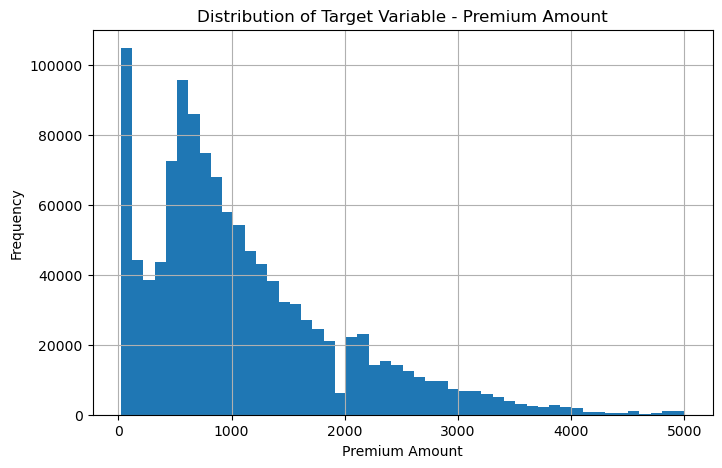

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['Premium Amount'].hist(bins=50)
plt.title("Distribution of Target Variable - Premium Amount")
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.show()


#1.2 Perform Exploratory Data Analysis (EDA)


In [6]:
print(f"📏 Total Rows (Data Points): {df.shape[0]}")
print(f"📐 Total Columns (Features): {df.shape[1]}")


📏 Total Rows (Data Points): 1200000
📐 Total Columns (Features): 21


In [7]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})

print("❓ Missing Value Summary:")
display(missing_summary[missing_summary['Missing Count'] > 0])


❓ Missing Value Summary:


,Missing Count,Missing %
Previous Claims,364029,30.335750
Occupation,358075,29.839583
Credit Score,137882,11.490167
Number of Dependents,109672,9.139333
Customer Feedback,77824,6.485333
Health Score,74076,6.173000
Annual Income,44949,3.745750
Age,18705,1.558750
Marital Status,18529,1.544083
Vehicle Age,6,0.000500


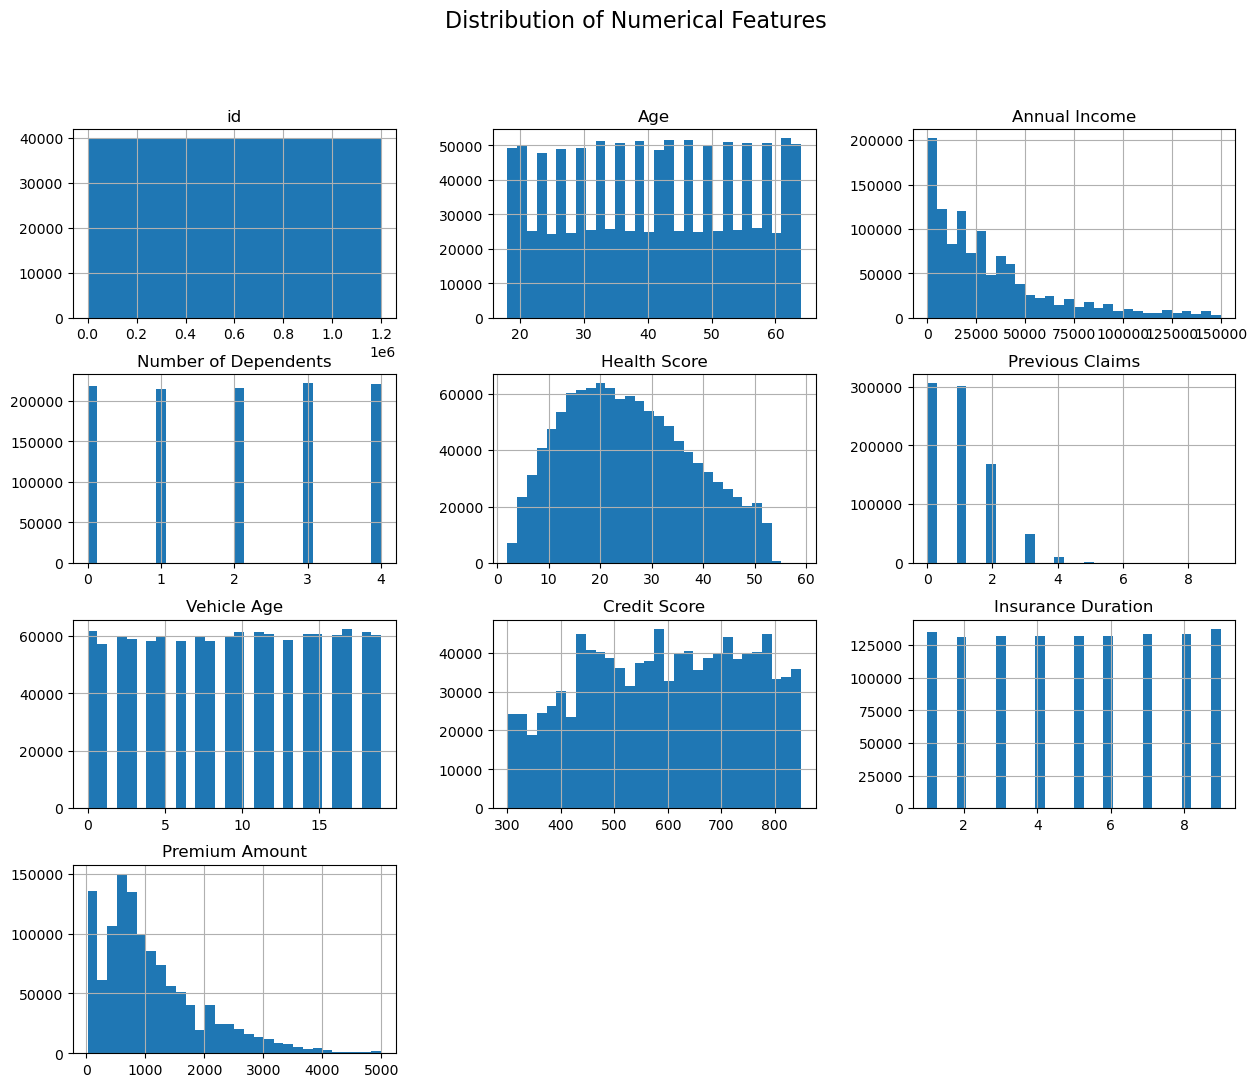

In [8]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


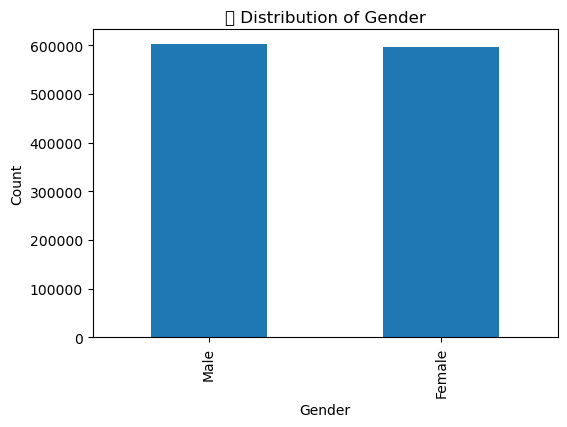

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


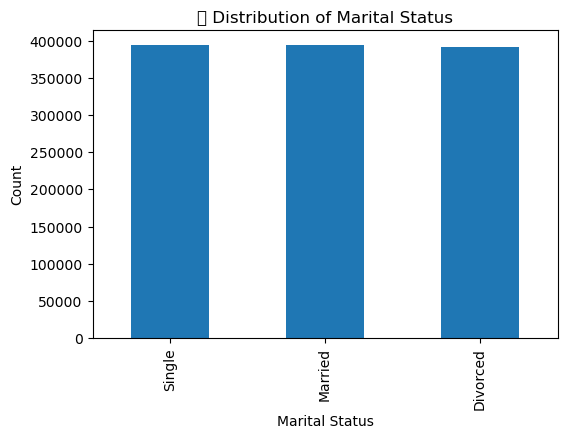

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


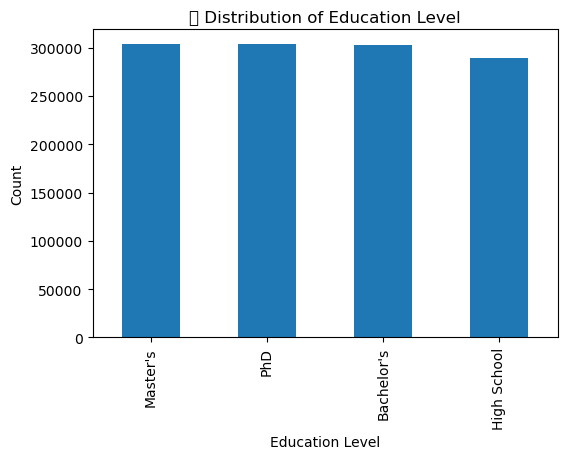

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


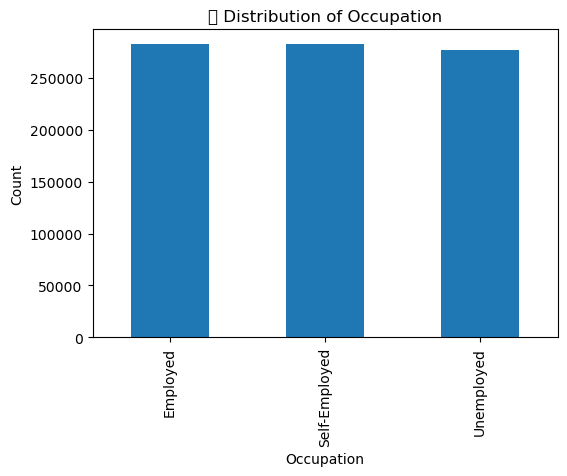

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


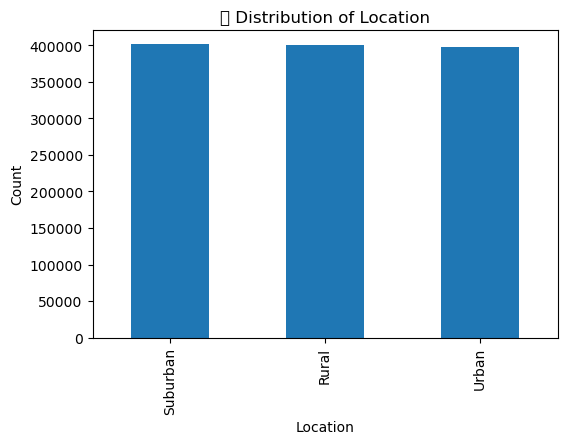

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


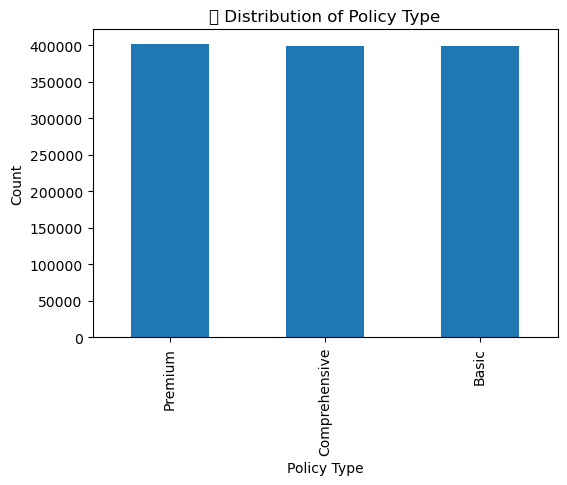

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


⏭ Skipping Policy Start Date (Date-like / high-cardinality column)


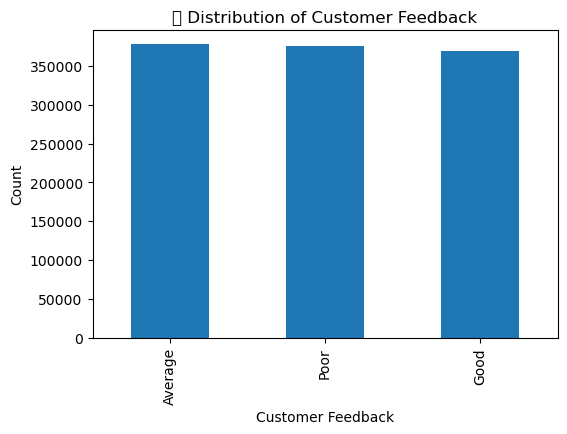

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


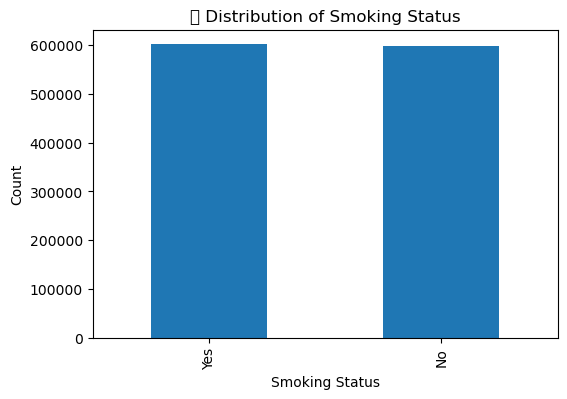

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


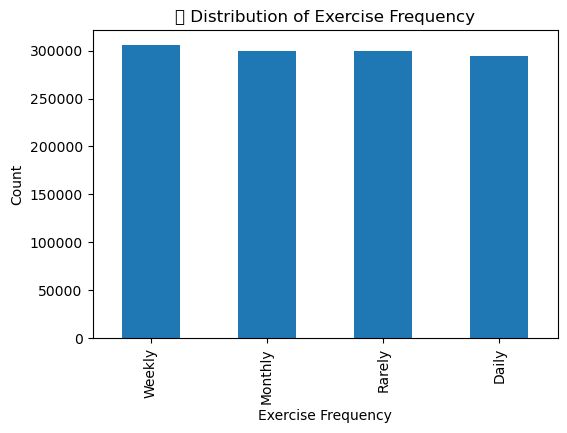

C:\Users\welcome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


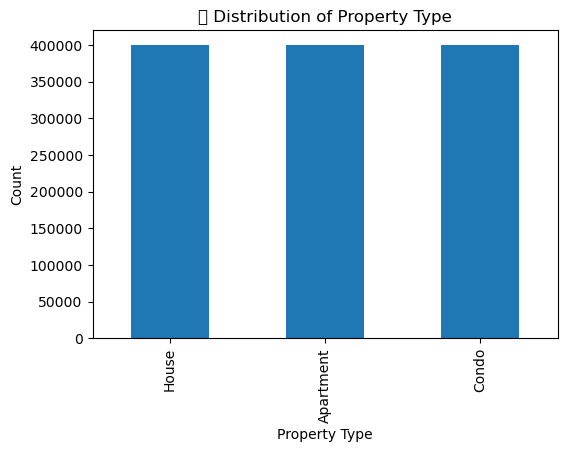

In [9]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if col == "Policy Start Date":  # Skip date field
        print(f"⏭ Skipping {col} (Date-like / high-cardinality column)")
        continue
    if df[col].nunique() <= 20:     # Plot only low-cardinality features
        plt.figure(figsize=(6,4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"🔤 Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"⚠ {col} has {df[col].nunique()} unique values — too large to plot efficiently.")


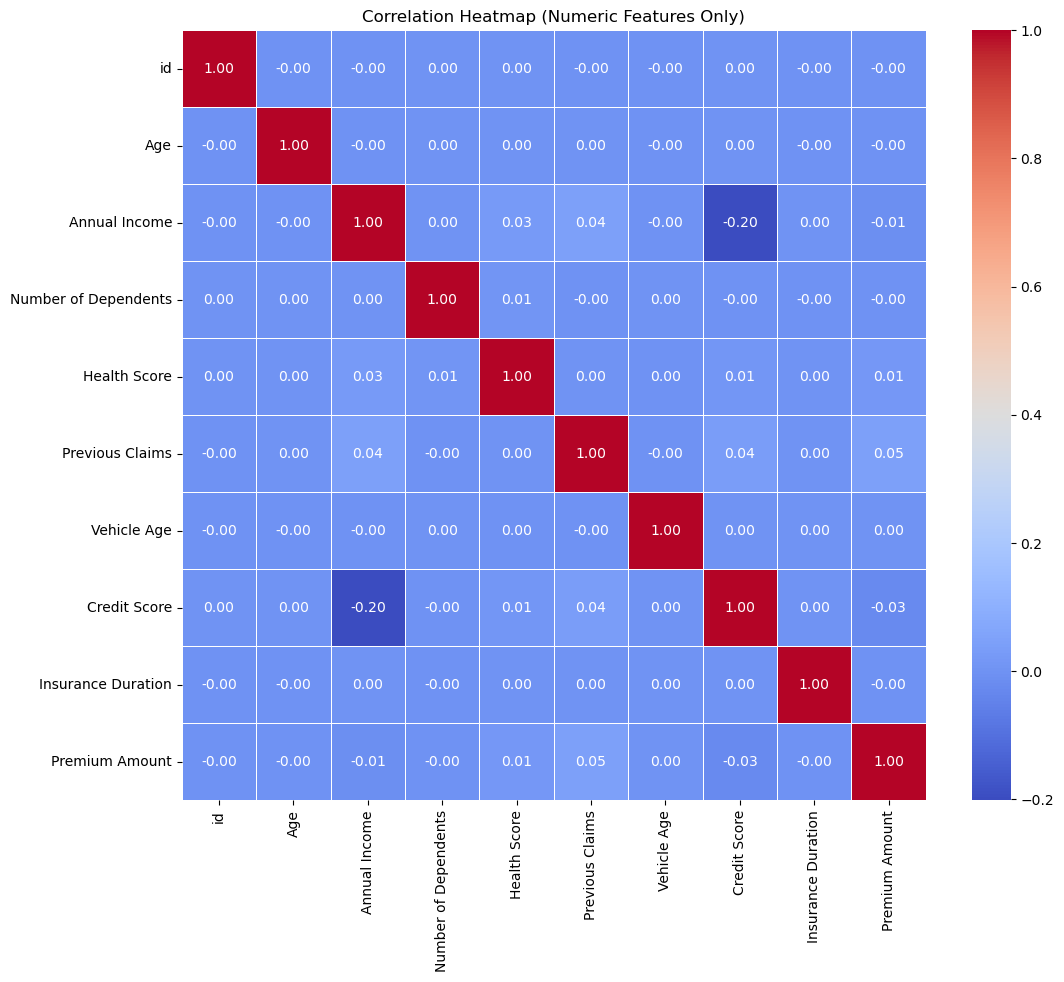

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,10))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# Step 2: Data Preprocessing


## 2.1 Handle Missing Values


In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()


# ---------- Handle Missing Values ----------

# 1️⃣ Numerical Features - Median Imputation
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# 2️⃣ Categorical Features - Mode Imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# ---------- Verify ----------
print("✅ Missing values after imputation:")
display(df.isnull().sum().sort_values(ascending=False).head(20))


✅ Missing values after imputation:


id                      0
Previous Claims         0
Property Type           0
Exercise Frequency      0
Smoking Status          0
Customer Feedback       0
Policy Start Date       0
Insurance Duration      0
Credit Score            0
Vehicle Age             0
Policy Type             0
Age                     0
Location                0
Health Score            0
Occupation              0
Education Level         0
Number of Dependents    0
Marital Status          0
Annual Income           0
Gender                  0
dtype: int64

In [12]:
def remove_outliers_iqr(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    filtered_df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
    return filtered_df

In [13]:
columns_to_clean=['Annual Income', 'Health Score', 'Previous Claims', 'Premium Amount']

for col in columns_to_clean:
    df=remove_outliers_iqr(df, col)

In [15]:
df.shape

(1026876, 21)

In [ ]:
df.to_csv('cleaned_dataset.csv',index=False)

## 2.2 Convert Categorical Variables to Numerical Form


In [16]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('cleaned_dataset.csv')
# Separate categorical columns (excluding high-cardinality text)
cat_cols = df.select_dtypes(include='object').columns.tolist()

if "Policy Start Date" in cat_cols:
    cat_cols.remove("Policy Start Date")

# ---------- Label Encoding for binary categories ----------
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# ---------- One-Hot Encoding for remaining categorical columns ----------
remaining_cat_cols = [col for col in cat_cols if col not in binary_cols]
df = pd.get_dummies(df, columns=remaining_cat_cols, drop_first=True)

print("✅ Categorical encoding completed. Sample data:")
display(df.head())


✅ Categorical encoding completed. Sample data:


,id,Age,Gender,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,...,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0,19.0,0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,...,True,False,True,False,True,False,False,True,False,True
1,1,39.0,0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,...,False,True,False,False,False,True,False,False,False,True
2,2,23.0,1,25602.0,3.0,47.177549,1.0,14.0,595.0,3.0,...,False,False,True,True,False,False,False,True,False,True
3,4,21.0,1,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,...,False,False,True,False,True,False,False,True,False,True
4,6,41.0,1,40336.0,0.0,24.578648,2.0,8.0,807.0,6.0,...,False,False,False,False,True,False,False,True,False,True


## 2.3  Split the Data into Training and Evaluation Sets


In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
target = 'Premium Amount'  # Target variable
X = df.drop(columns=[target, 'Policy Start Date'], errors='ignore')  # Exclude target and high-card text
y = df[target]

# Split into training and evaluation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify shapes
print(f"Training set: X={X_train.shape}, y={y_train.shape}")
print(f"Test set: X={X_test.shape}, y={y_test.shape}")


Training set: X=(821500, 29), y=(821500,)
Test set: X=(205376, 29), y=(205376,)


## 2.4  Feature Scaling


In [18]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding target)
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training set and transform both training and test sets
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Verify scaled data
print("✅ Feature scaling completed. Sample of scaled features:")
display(X_train[num_cols].head())


✅ Feature scaling completed. Sample of scaled features:


,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
39588,-1.599073,-0.383000,-0.919489,1.472351,1.123122,-1.387051,1.112125,-0.938594,0.378940
224173,-0.976195,-1.648212,2.025771,-0.007279,0.288460,0.198233,0.939022,0.487178,-1.547652
859424,1.167087,0.435667,-0.916037,0.732536,1.801467,1.783517,0.419711,0.229249,1.534895
260980,-0.852122,-0.159727,-0.626380,-0.007279,-0.938015,-1.387051,1.112125,-0.014350,-0.006379
270745,-0.819147,-0.383000,-1.055997,-1.486910,-0.410134,0.198233,-1.484427,-0.043009,-0.391697


# Step 3: Model Development


In [19]:
# -------------------------
# Imports for modeling
# -------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import joblib
import mlflow
import mlflow.sklearn
import numpy as np

# -------------------------
# Identify categorical columns
# -------------------------
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# -------------------------
# Feature Engineering (optional)
# -------------------------
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        # Example engineered features
        if 'Annual Income' in X.columns and 'Number of Dependents' in X.columns:
            X['Income_per_Dependent'] = X['Annual Income'] / (X['Number of Dependents'] + 1)
        if 'Age' in X.columns and 'Health Score' in X.columns:
            X['Age_Health_Interaction'] = X['Age'] * X['Health Score']
        return X

# Add engineered features to numeric list
extra_features = ['Income_per_Dependent', 'Age_Health_Interaction']
num_cols = num_cols.tolist() + extra_features

# -------------------------
# Preprocessing pipelines
# -------------------------
numeric_pipeline = Pipeline([('pass', 'passthrough')])  # already scaled
categorical_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# -------------------------
# Models
# -------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1, tree_method='hist', eval_metric='rmse')
}

results = {}
pipelines = {}

# -------------------------
# Train & Evaluate Models
# -------------------------
for name, model in models.items():
    pipeline = Pipeline([
        ('feature_engineer', FeatureEngineer()),
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
    pipelines[name] = pipeline
    print(f"{name} → RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

# -------------------------
# Hyperparameter tuning for XGBoost
# -------------------------
param_grid = {
    'regressor__n_estimators': [100, 300, 500],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__gamma': [0, 1, 5]
}

mlflow.set_experiment("Smart_Premium_XGBoost_Tuning")

from sklearn.model_selection import RandomizedSearchCV

with mlflow.start_run(run_name="XGBoost_HyperTune"):
    search = RandomizedSearchCV(
        pipelines['XGBoost'], param_distributions=param_grid,
        n_iter=20, cv=3, scoring='neg_root_mean_squared_error',
        verbose=2, random_state=42, n_jobs=-1
    )
    
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Log parameters and metrics in MLflow
    mlflow.log_params(search.best_params_)
    mlflow.log_metrics({"RMSE": rmse, "MAE": mae, "R2": r2})
    mlflow.sklearn.log_model(best_model, artifact_path="xgb_best_model")
    
    print("✅ Hyperparameter tuning completed!")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    print("Best hyperparameters:", search.best_params_)

# -------------------------
# Save the best model locally
# -------------------------
joblib.dump(best_model, "best_xgb_pipeline.pkl")
print("✅ Best XGBoost pipeline saved as 'best_xgb_pipeline.pkl'")


Linear Regression → RMSE: 684.09, MAE: 547.84, R²: 0.0055
Decision Tree → RMSE: 964.74, MAE: 729.07, R²: -0.9779
Random Forest → RMSE: 677.34, MAE: 536.19, R²: 0.0250
XGBoost → RMSE: 669.92, MAE: 528.71, R²: 0.0463


2025/10/04 23:00:19 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
11 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 655, in fit
    Xt = self._fit(X, 

✅ Hyperparameter tuning completed!
RMSE: 669.22, MAE: 528.89, R²: 0.0483
Best hyperparameters: {'regressor__subsample': 0.8, 'regressor__n_estimators': 500, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.01, 'regressor__gamma': 5, 'regressor__colsample_bytree': 1.0}
✅ Best XGBoost pipeline saved as 'best_xgb_pipeline.pkl'
